In [1]:
from gensim.models import word2vec
import matplotlib.pyplot as plt
from pyvi import ViTokenizer
import pandas as pd
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# %cd /content/drive/My Drive/Colab Notebooks/Text_Generator

In [4]:
# %ls -la

## Import and normalize data

In [2]:
news = pd.read_csv('./data/vnexpress/csv/vnexpress.csv').drop(columns='Unnamed: 0', axis=1)
print(news.shape)

,article_id,content,topic,sub-topic,title,description
0,0,"""Xin lỗi đi"". Nhiều thế hệ đã dùng câu này để ...",doi-song,to-am,Có nên bắt trẻ xin lỗi?,Một số cha mẹ cho rằng việc ép trẻ nói lời xin...
1,1,Một nghiên cứu của đại học Wisconsin-Madison (...,doi-song,to-am,Tác dụng bất ngờ của việc gọi cho mẹ,"Khi bạn có một ngày tồi tệ như sếp mắng, mất c..."
2,2,"Các yếu tố như độ tuổi của trẻ, mối quan hệ gi...",doi-song,to-am,"Thiệt thòi của trẻ 'nửa tuần ở với bố, nửa tuầ...","Khi cha mẹ mỗi người ở một nhà sau ly hôn, việ..."
3,3,Ở tuổi đôi mươi chị Trần Thị Liên kết hôn với ...,doi-song,to-am,Bi kịch ở tuổi 50 của người phụ nữ Hậu Giang,"Trong nhà tình nghĩa, vợ chồng chị Liên, 50 tu..."
4,4,"Chị Hoàng Thị Hòa, 34 tuổi, ở Hà Nam lấy chồng...",doi-song,to-am,Sốc văn hóa nhà chồng,"Về làm dâu, chị Hòa nhận ra đã bước chân vào m..."


In [3]:
news['tag'] = news['content'] + news['topic'] + news['sub-topic'] + news['title'] + news['description']
news.drop(columns=['description','sub-topic','content'], inplace=True)

In [4]:
news.info()

,article_id,topic,title,tag
0,0,doi-song,Có nên bắt trẻ xin lỗi?,"""Xin lỗi đi"". Nhiều thế hệ đã dùng câu này để ..."
1,1,doi-song,Tác dụng bất ngờ của việc gọi cho mẹ,Một nghiên cứu của đại học Wisconsin-Madison (...
2,2,doi-song,"Thiệt thòi của trẻ 'nửa tuần ở với bố, nửa tuầ...","Các yếu tố như độ tuổi của trẻ, mối quan hệ gi..."
3,3,doi-song,Bi kịch ở tuổi 50 của người phụ nữ Hậu Giang,Ở tuổi đôi mươi chị Trần Thị Liên kết hôn với ...
4,4,doi-song,Sốc văn hóa nhà chồng,"Chị Hoàng Thị Hòa, 34 tuổi, ở Hà Nam lấy chồng..."


In [5]:
news.isna().sum()

article_id     0
topic          0
title          2
tag           63
dtype: int64

In [6]:
news.dropna(axis=0, inplace=True)

In [7]:
news['tag'] = news['tag'].apply(lambda x: x.lower())
news['tag'] = news['tag'].apply(ViTokenizer.tokenize)

In [8]:
news

,article_id,topic,title,tag
0,0,doi-song,Có nên bắt trẻ xin lỗi?,""" xin_lỗi đi "" . nhiều thế_hệ đã dùng câu này ..."
1,1,doi-song,Tác dụng bất ngờ của việc gọi cho mẹ,một nghiên_cứu của đại_học wisconsin - madison...
2,2,doi-song,"Thiệt thòi của trẻ 'nửa tuần ở với bố, nửa tuầ...","các yếu_tố như độ tuổi của trẻ , mối quan_hệ g..."
3,3,doi-song,Bi kịch ở tuổi 50 của người phụ nữ Hậu Giang,ở tuổi đôi_mươi chị trần thị liên_kết_hôn với ...
4,4,doi-song,Sốc văn hóa nhà chồng,"chị hoàng thị_hòa , 34 tuổi , ở hà nam lấy chồ..."
...,...,...,...,...
2476,2476,the-thao,Việt Nam thua trận đậm nhất World Cup nữ 2023,"* ghi_bàn : martens 8 ' , snoeijs 11 ' , brugt..."
2477,2477,the-thao,Việt Nam hết hy vọng qua vòng bảng World Cup nữ,"ghi_bàn : encarnacao 7 ' , nazareth 21 ' . trậ..."
2478,2478,the-thao,Việt Nam thua Mỹ ở trận ra quân World Cup nữ,"* ghi_bàn : smith 14 , 45 , horan 77 trước đối..."
2479,2479,the-thao,World Cup nữ 2023 khai mạc,"sau khi cầu_thủ hai đội khởi_động xong , ban t..."


## Create Word2Vec model and find similarity documents

In [9]:
sequences = news['tag'].to_list()
input_gensim = []

for sen in sequences:
  input_gensim.append(sen.split())

In [27]:
model = word2vec.Word2Vec(input_gensim, vector_size=128, window=5, min_count=0, workers=4, sg=1)
model.save("./model/word.model")

In [28]:
model = word2vec.Word2Vec.load("./model/word.model")

In [29]:
question = '''Với CLB Hà Lan, tiền đạo cánh người Brazil đạt tỷ lệ ghi bàn và kiến tạo kỳ vọng là 0,58, chỉ xếp thứ 14 nếu đặt ở Ngoại hạng Anh. 
Ngoài ra, Antony cũng được "thổi phồng" nhờ chơi cho CLB vượt trội về tài chính và lực lượng so với phần còn lại của giải vô địch Hà Lan.'''

def embedding(question, input_gensim, length):
  question_tokens = ViTokenizer.tokenize(question)
  print('After tonkenized:', question_tokens)
  
  # Word embeddings
  question_embeddings = [model.wv[word] for word in question_tokens.split() if word in model.wv]

  # Post embeddings
  post_check = input_gensim[:length]

  post_embeddings = []
  for post in post_check:
    post_embedding = [model.wv[word] for word in post if word in model.wv]
    post_embeddings.append(post_embedding)

  return question_embeddings, post_embeddings

question_embeddings, post_embeddings = embedding(question, input_gensim, len(input_gensim))

After tonkenized: Với CLB Hà_Lan , tiền_đạo cánh người Brazil đạt tỷ_lệ ghi_bàn và kiến_tạo kỳ_vọng là 0,58 , chỉ xếp thứ 14 nếu đặt ở Ngoại_hạng Anh . 
 Ngoài_ra , Antony cũng được " thổi_phồng " nhờ chơi cho CLB vượt_trội về tài_chính và lực_lượng so với phần còn lại của giải vô_địch Hà_Lan .


In [30]:
print(len(question_embeddings))
question_embeddings[0]

43


array([ 0.32563335, -0.2200374 ,  0.22177692,  0.2059293 ,  0.19198895,
        0.10704664,  0.19683476,  0.04228288,  0.3236496 ,  0.08484236,
        0.3077222 ,  0.07417361, -0.01756969, -0.11773268,  0.1039374 ,
        0.2545769 , -0.10034151,  0.06473135, -0.02649602,  0.10956846,
       -0.07766375,  0.42976552, -0.20938933, -0.13511653, -0.03466656,
        0.17198452, -0.15959671,  0.3591999 ,  0.1988049 ,  0.12190097,
        0.01249912,  0.01892602,  0.31817758,  0.12703103,  0.01635085,
       -0.1891786 ,  0.4376829 ,  0.09847051,  0.14443111,  0.19726089,
       -0.08993676,  0.36015478, -0.09298702, -0.11170147,  0.3389243 ,
        0.25883687, -0.14201051, -0.11090986, -0.34284306,  0.2823185 ,
       -0.10663529,  0.18192689,  0.17300567, -0.08286894, -0.16188905,
       -0.08314408,  0.20898655, -0.42838064, -0.2738382 ,  0.19364144,
        0.22518803, -0.14859141, -0.03501191, -0.07117792,  0.30635363,
       -0.15368706,  0.04575999,  0.09087019, -0.11288305, -0.16

In [31]:
print(len(post_embeddings))
post_embeddings[0][0]

2418


array([ 0.07417916, -0.49619576,  0.08351395, -0.2105982 ,  0.15815656,
        0.18380192,  0.12085739,  0.0926959 , -0.10655892,  0.0912571 ,
       -0.02261165,  0.28516492, -0.42176574, -0.3534514 ,  0.05124327,
        0.06654461, -0.36770266,  0.30821076,  0.27465037, -0.38589957,
       -0.2383077 ,  0.24370895, -0.01565527,  0.09606516, -0.11788579,
       -0.01792455,  0.08079635,  0.04187681,  0.42983127, -0.08719885,
        0.14436202, -0.08561802,  0.09425565,  0.1393514 ,  0.16278505,
        0.947422  ,  0.57195836, -0.04950216,  0.08113009,  0.19468114,
       -0.11678642,  0.44833726, -0.17077523,  0.02301508,  0.50597423,
        0.31487957, -0.36066723, -0.13446926, -0.07330802,  0.07101463,
        0.1255125 , -0.2001468 ,  0.02846107,  0.06918957, -0.03489093,
       -0.25342223,  0.06955974, -0.43930385, -0.08671964, -0.11465982,
        0.02573625, -0.28732133,  0.0027398 ,  0.15986364,  0.11486782,
       -0.06451386,  0.1233296 , -0.03438614, -0.1365833 , -0.27

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
# Calculate sentence embeddings by averaging word embeddings
def mean_vector_embedding(embeddings):
  if len(embeddings) == 0:
      return np.zeros(model.vector_size)
  return np.mean(embeddings, axis=0)

mean_sentence_embedding = mean_vector_embedding(question_embeddings)
print('The mean of an embedding vector:', mean_sentence_embedding)

def mean_embedded_posts(post_embeddings):
  mean_post_embedding = []
  for post_embedding in post_embeddings:
      mean_post_embedding.append(mean_vector_embedding(post_embedding))

  return mean_post_embedding

mean_post_embedding = mean_embedded_posts(post_embeddings)
print('The mean of embedding posts:', len(mean_post_embedding))

# Calculate similarity (cosine similarity)
similarity_score = cosine_similarity([mean_sentence_embedding], mean_post_embedding)

# Print the similarity score
print(f"Similarity Score: {similarity_score}")

The mean of an embedding vector: [ 0.2060609  -0.36092493  0.23149681  0.13952339  0.19479139  0.04408347
  0.00390991 -0.05786847  0.11710301 -0.08447723  0.26941216 -0.08579374
 -0.14278883 -0.13661203  0.16953135  0.00570594 -0.2738116   0.1668204
 -0.06169408 -0.02318943 -0.08422637  0.24054259 -0.17598957 -0.02691149
 -0.15748796  0.04579795 -0.14821468  0.17959508  0.43770465  0.00142606
 -0.01996854  0.04719037  0.15128173  0.11841795 -0.02142226  0.17047915
  0.30106083  0.0134889   0.20822644  0.12998109 -0.2238035   0.2487837
 -0.097963    0.0915413   0.305367    0.36767808 -0.14154296 -0.1807639
 -0.2754564   0.14469324 -0.10911451  0.15945318  0.23640056 -0.11546912
 -0.12011589  0.02422413  0.20279597 -0.28430927 -0.13024154 -0.02042106
  0.13636565 -0.12095206  0.04966048 -0.00058356  0.23720063 -0.09330579
  0.03395095 -0.03187555 -0.0032984  -0.16662787  0.08146337 -0.06769751
 -0.17084175 -0.24582033  0.07954213 -0.1857767  -0.27716002  0.15696375
 -0.14027934  0.19016

In [34]:
# Convert the list of lists into a numpy array
np_similarity_score = np.array(similarity_score)
print('np_question_embedding', np_similarity_score)
# Sort the array in ascending order
sorted_indices = np.argsort(np_similarity_score[0])[::-1]

# Get the top 5 indices
top_5_indices = sorted_indices[:5]

# Print the sorted indices and the top 5 indices
print("Sorted Indices:", sorted_indices)
print("Top 5 Indices:", top_5_indices)

np_question_embedding [[0.9058411  0.9273442  0.91548413 ... 0.9511769  0.94131374 0.93026555]]
Sorted Indices: [2061 1956 2082 ... 1296 1283 1251]
Top 5 Indices: [2061 1956 2082 1943 2196]


In [35]:
news.loc[top_5_indices.tolist(), :]

,article_id,topic,title,tag
2061,2061,the-thao,Alcaraz thắng dễ trận ra quân Madrid Masters,alcaraz cho thấy cảm_giác bóng tốt dù lần đầu ...
1956,1956,khoa-hoc,Tại sao máy bay tư nhân bay cao hơn máy bay th...,"có nhiều lý_do khiến máy_bay tư_nhân , ngoài đ..."
2082,2082,the-thao,Tsitsipas vô địch Monte Carlo Masters,trận chung_kết tưởng như cân tài cuối_cùng lại...
1943,1943,khoa-hoc,Não người có thể tồn tại bao lâu khi thiếu oxy?,não người là một cơ_quan cực_kỳ phức_tạp và mo...
2196,2196,the-thao,Vua nước rút Lê Nguyệt Minh thắng chặng giải x...,"trên chặng đua dài 134 km từ tuy hòa , phú yên..."


## Visualize the relationships

* The relationships among words

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [47]:
def words_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.wv.vocab]
        
    word_vectors = np.array([model.wv[w] for w in words])
    
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y-0.10, word)

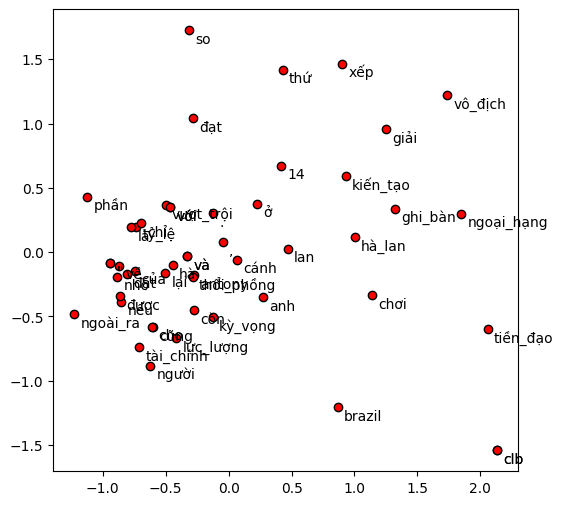

In [48]:
sentence = '''Với CLB Hà Lan tiền đạo cánh người Brazil đạt tỷ lệ ghi bàn và kiến tạo kỳ vọng là chỉ xếp thứ 14 nếu đặt ở Ngoại hạng Anh. 
Ngoài ra, Antony cũng được "thổi phồng" nhờ chơi cho CLB vượt trội về tài chính và lực lượng so với phần còn lại của giải vô địch Hà Lan'''

sentence = sentence.lower()
sentence = ViTokenizer.tokenize(sentence)
words = sentence.split()

words_scatterplot(model, words)

* The relationships among documents

In [49]:
_, temp_embeddings = embedding("", input_gensim, 100)
mean_temp_embedding = mean_embedded_posts(temp_embeddings)

After tonkenized: 


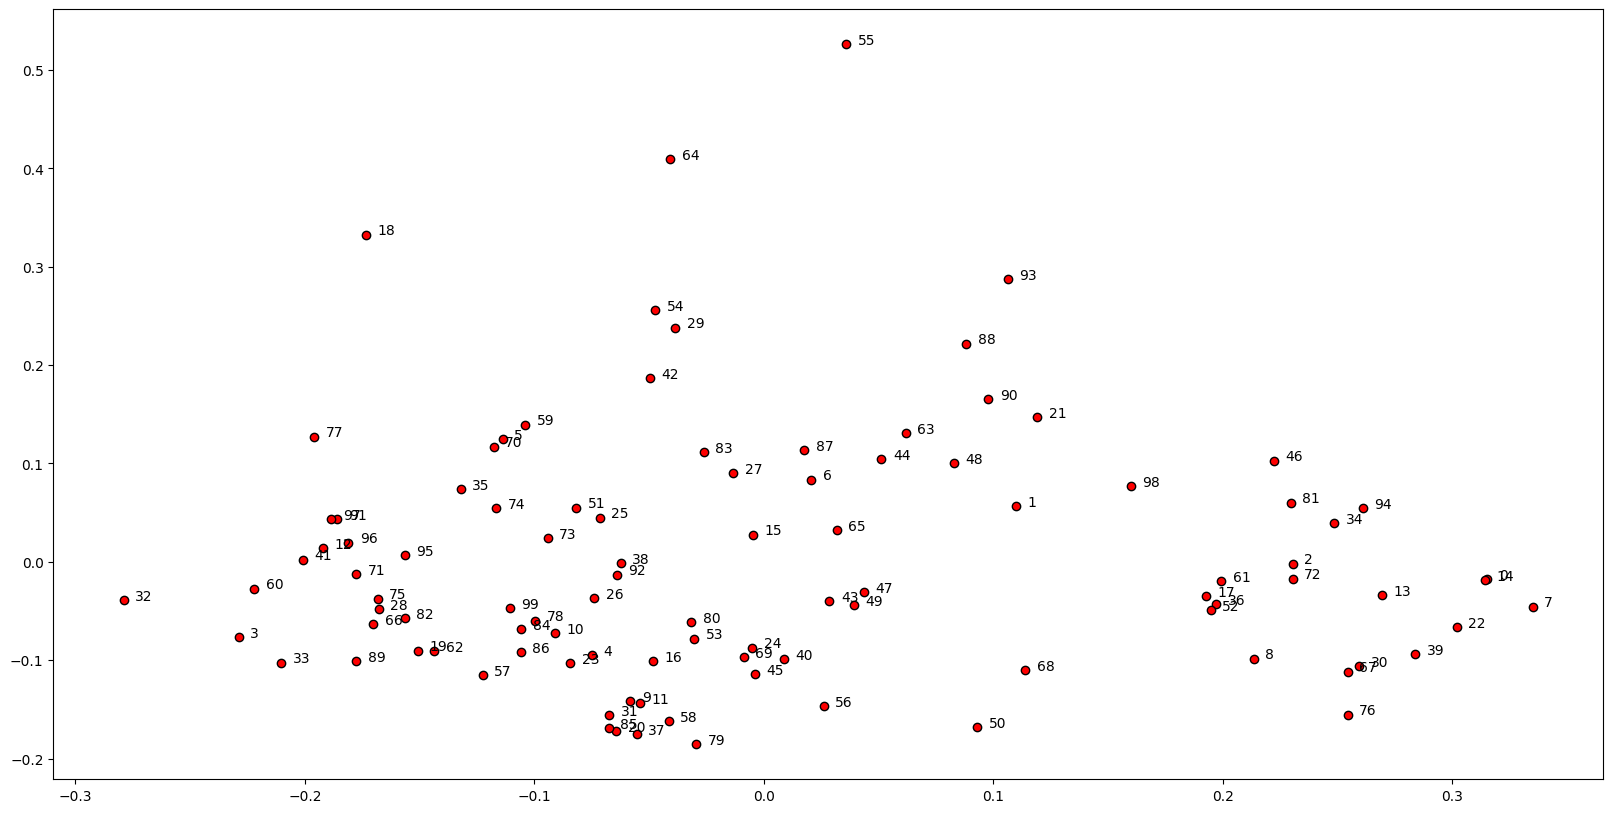

In [50]:
# mean_post_embedding
post_vectors = []
for post_embedding in mean_temp_embedding:
    post_vectors.append(post_embedding.tolist())

twodim = PCA().fit_transform(post_vectors)[:,:2]
index = [i for i,_ in enumerate(mean_temp_embedding)]

plt.figure(figsize=(20,10))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for doc, (x,y) in zip(index, twodim):
    plt.text(x+0.005, y, doc)

## Phân cụm phân hoạch bằng thuật toán Kmean

In [66]:
text_embeddings = []
for text in input_gensim:
    text_embedding = [model.wv[word] for word in text if word in model.wv]
    text_embeddings.append(text_embedding)

In [83]:
print(len(text_embeddings))
print(len(text_embeddings[0]))
text_embeddings[0]

2418
852


[array([ 0.07417916, -0.49619576,  0.08351395, -0.2105982 ,  0.15815656,
         0.18380192,  0.12085739,  0.0926959 , -0.10655892,  0.0912571 ,
        -0.02261165,  0.28516492, -0.42176574, -0.3534514 ,  0.05124327,
         0.06654461, -0.36770266,  0.30821076,  0.27465037, -0.38589957,
        -0.2383077 ,  0.24370895, -0.01565527,  0.09606516, -0.11788579,
        -0.01792455,  0.08079635,  0.04187681,  0.42983127, -0.08719885,
         0.14436202, -0.08561802,  0.09425565,  0.1393514 ,  0.16278505,
         0.947422  ,  0.57195836, -0.04950216,  0.08113009,  0.19468114,
        -0.11678642,  0.44833726, -0.17077523,  0.02301508,  0.50597423,
         0.31487957, -0.36066723, -0.13446926, -0.07330802,  0.07101463,
         0.1255125 , -0.2001468 ,  0.02846107,  0.06918957, -0.03489093,
        -0.25342223,  0.06955974, -0.43930385, -0.08671964, -0.11465982,
         0.02573625, -0.28732133,  0.0027398 ,  0.15986364,  0.11486782,
        -0.06451386,  0.1233296 , -0.03438614, -0.1

In [87]:
mean_text_embeddings = []
for emebbed in text_embeddings:
     temp = np.mean(emebbed, axis=1)
     mean_text_embeddings.append(temp)
     
print(len(mean_text_embeddings))
print(len(mean_text_embeddings[0]))
np.array(mean_text_embeddings)

2418
852


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2418,) + inhomogeneous part.